In [242]:
import numpy as np

In [243]:
input_size=3  # no of features for which the model needs to be trained 
layers=[4,3] # no of neurons in first and second layer
output_size=2

In [244]:
def softmax(a):
    e_pa = np.exp(a)
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

# takes an array filled with output values and returns a same sized array filled with respective calculated probabilities 

In [245]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model={}
        
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model=model
    
    def forward(self,x):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        #Here tanh is used as activation function
        z1=np.dot(x,w1) + b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2) + b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,w3) + b3
        y_=softmax(z3)
        
        self.activation_output = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m=x.shape[0]
        
        a1,a2,y_=self.activation_output
        
        delta3 = y_-y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)/float(m)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,w3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)/float(m)
        
        delta1= (1-np.square(a1))*np.dot(delta2,w2.T)
        dw1 = np.dot(x.T,delta1)
        db1 = np.sum(delta1,axis=0)/float(m)
        
        
        self.model['W1'] -=learning_rate*dw1
        self.model['b1'] -=learning_rate*db1
  
        self.model['W2'] -=learning_rate*dw2
        self.model['b2'] -=learning_rate*db2
        
        self.model['W3'] -=learning_rate*dw3
        self.model['b3'] -=learning_rate*db3
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        w1,w2,w3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_output
        
        print("w1:",w1.shape)
        print("a1:",a1.shape)
        print("w2:",w2.shape)
        print("a2:",a2.shape)
        print("w3:",w3.shape)
        print("y_:",y_.shape)
        
    

In [246]:
def loss(y_oht,p):
        l=-np.mean(y_oht*np.log(p))
        return l

def one_hot(y,depth):
        m=y.shape[0]
        y_oht = np.zeros((m,depth))
        y_oht[np.arange(m),y]=1
        
        return y_oht

In [247]:
w1=np.random.randn(input_size,layers[0])
print(w1)

[[-0.90729836  0.0519454   0.72909056  0.12898291]
 [ 1.13940068 -1.23482582  0.40234164 -0.68481009]
 [-0.87079715 -0.57884966 -0.31155253  0.05616534]]


In [265]:
from sklearn.datasets import make_circles,make_moons,make_classification
import matplotlib.pyplot as plt

In [249]:
X,Y = make_circles(n_samples=500, shuffle=True,noise=0.05,random_state=1,factor=0.8)

In [274]:
print(Y)

[1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1
 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 0 

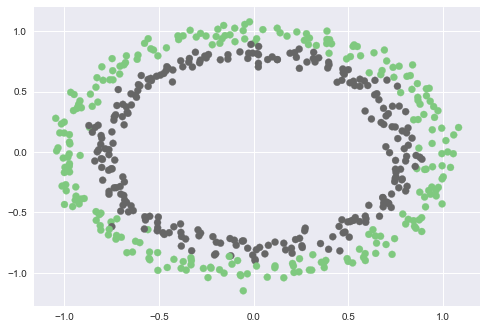

In [250]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

In [251]:
model = NeuralNetwork(input_size=2,layers=[10,4],output_size=2)
# we have a model with 2 features, 10 neurons on first layer, 4 neuron on second layer and expected ouput 2 

In [252]:
model.forward(X)

array([[0.07135496, 0.92864504],
       [0.0252705 , 0.9747295 ],
       [0.15439902, 0.84560098],
       [0.02590134, 0.97409866],
       [0.97423778, 0.02576222],
       [0.96419691, 0.03580309],
       [0.03741109, 0.96258891],
       [0.73047016, 0.26952984],
       [0.95510868, 0.04489132],
       [0.02219465, 0.97780535],
       [0.02827971, 0.97172029],
       [0.81149347, 0.18850653],
       [0.03740692, 0.96259308],
       [0.0268464 , 0.9731536 ],
       [0.06447007, 0.93552993],
       [0.96869361, 0.03130639],
       [0.95539586, 0.04460414],
       [0.41339302, 0.58660698],
       [0.10224504, 0.89775496],
       [0.14103553, 0.85896447],
       [0.24757086, 0.75242914],
       [0.04693912, 0.95306088],
       [0.04204106, 0.95795894],
       [0.96445179, 0.03554821],
       [0.028442  , 0.971558  ],
       [0.06121185, 0.93878815],
       [0.6861095 , 0.3138905 ],
       [0.02468014, 0.97531986],
       [0.8907949 , 0.1092051 ],
       [0.97606298, 0.02393702],
       [0.

In [253]:
model.summary()

w1: (2, 10)
a1: (500, 10)
w2: (10, 4)
a2: (500, 4)
w3: (4, 2)
y_: (500, 2)


In [254]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    
    classes=2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        training_loss.append(l)
        model.backward(X,Y_OHT,learning_rate)
        
        if(logs):
            print("Epoch %d Loss %0.4f"%(ix,l))
            
    return training_loss
    

In [255]:
losses=train(X,Y,model,500,0.001)

Epoch 0 Loss 0.7325
Epoch 1 Loss 0.5609
Epoch 2 Loss 0.4590
Epoch 3 Loss 0.4063
Epoch 4 Loss 0.3797
Epoch 5 Loss 0.3659
Epoch 6 Loss 0.3583
Epoch 7 Loss 0.3539
Epoch 8 Loss 0.3514
Epoch 9 Loss 0.3499
Epoch 10 Loss 0.3489
Epoch 11 Loss 0.3483
Epoch 12 Loss 0.3479
Epoch 13 Loss 0.3476
Epoch 14 Loss 0.3474
Epoch 15 Loss 0.3473
Epoch 16 Loss 0.3472
Epoch 17 Loss 0.3472
Epoch 18 Loss 0.3471
Epoch 19 Loss 0.3471
Epoch 20 Loss 0.3471
Epoch 21 Loss 0.3470
Epoch 22 Loss 0.3470
Epoch 23 Loss 0.3470
Epoch 24 Loss 0.3470
Epoch 25 Loss 0.3470
Epoch 26 Loss 0.3470
Epoch 27 Loss 0.3470
Epoch 28 Loss 0.3470
Epoch 29 Loss 0.3469
Epoch 30 Loss 0.3469
Epoch 31 Loss 0.3469
Epoch 32 Loss 0.3469
Epoch 33 Loss 0.3469
Epoch 34 Loss 0.3469
Epoch 35 Loss 0.3469
Epoch 36 Loss 0.3469
Epoch 37 Loss 0.3469
Epoch 38 Loss 0.3469
Epoch 39 Loss 0.3469
Epoch 40 Loss 0.3469
Epoch 41 Loss 0.3469
Epoch 42 Loss 0.3469
Epoch 43 Loss 0.3468
Epoch 44 Loss 0.3468
Epoch 45 Loss 0.3468
Epoch 46 Loss 0.3468
Epoch 47 Loss 0.3468
Ep

Epoch 470 Loss 0.3464
Epoch 471 Loss 0.3464
Epoch 472 Loss 0.3464
Epoch 473 Loss 0.3464
Epoch 474 Loss 0.3464
Epoch 475 Loss 0.3464
Epoch 476 Loss 0.3464
Epoch 477 Loss 0.3464
Epoch 478 Loss 0.3464
Epoch 479 Loss 0.3464
Epoch 480 Loss 0.3464
Epoch 481 Loss 0.3464
Epoch 482 Loss 0.3464
Epoch 483 Loss 0.3464
Epoch 484 Loss 0.3464
Epoch 485 Loss 0.3464
Epoch 486 Loss 0.3464
Epoch 487 Loss 0.3464
Epoch 488 Loss 0.3464
Epoch 489 Loss 0.3464
Epoch 490 Loss 0.3464
Epoch 491 Loss 0.3464
Epoch 492 Loss 0.3464
Epoch 493 Loss 0.3464
Epoch 494 Loss 0.3464
Epoch 495 Loss 0.3464
Epoch 496 Loss 0.3464
Epoch 497 Loss 0.3464
Epoch 498 Loss 0.3464
Epoch 499 Loss 0.3464


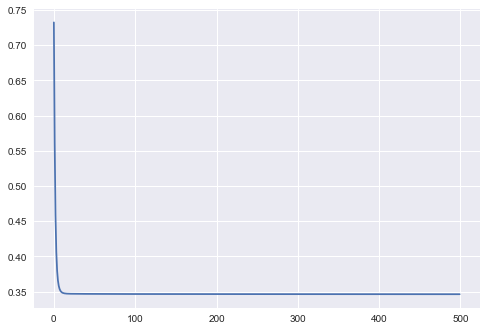

In [256]:
plt.plot(losses)
plt.show()

In [257]:
outputs = model.predict(X)

In [258]:
acc=np.sum(outputs==Y)/Y.shape[0]
print(acc)

0.516


In [259]:
from visualize import plot_decision_boundary

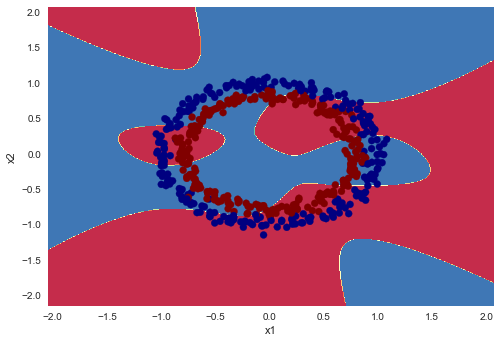

In [260]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

## XOR DATASET

In [261]:
X=np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
Y=np.array([0,1,1,0])
losses=train(X,Y,model,50,0.001)

Epoch 0 Loss 0.3461
Epoch 1 Loss 0.3461
Epoch 2 Loss 0.3460
Epoch 3 Loss 0.3459
Epoch 4 Loss 0.3458
Epoch 5 Loss 0.3458
Epoch 6 Loss 0.3457
Epoch 7 Loss 0.3456
Epoch 8 Loss 0.3455
Epoch 9 Loss 0.3454
Epoch 10 Loss 0.3454
Epoch 11 Loss 0.3453
Epoch 12 Loss 0.3452
Epoch 13 Loss 0.3451
Epoch 14 Loss 0.3450
Epoch 15 Loss 0.3450
Epoch 16 Loss 0.3449
Epoch 17 Loss 0.3448
Epoch 18 Loss 0.3447
Epoch 19 Loss 0.3447
Epoch 20 Loss 0.3446
Epoch 21 Loss 0.3445
Epoch 22 Loss 0.3444
Epoch 23 Loss 0.3443
Epoch 24 Loss 0.3443
Epoch 25 Loss 0.3442
Epoch 26 Loss 0.3441
Epoch 27 Loss 0.3440
Epoch 28 Loss 0.3439
Epoch 29 Loss 0.3439
Epoch 30 Loss 0.3438
Epoch 31 Loss 0.3437
Epoch 32 Loss 0.3436
Epoch 33 Loss 0.3436
Epoch 34 Loss 0.3435
Epoch 35 Loss 0.3434
Epoch 36 Loss 0.3433
Epoch 37 Loss 0.3432
Epoch 38 Loss 0.3432
Epoch 39 Loss 0.3431
Epoch 40 Loss 0.3430
Epoch 41 Loss 0.3429
Epoch 42 Loss 0.3429
Epoch 43 Loss 0.3428
Epoch 44 Loss 0.3427
Epoch 45 Loss 0.3426
Epoch 46 Loss 0.3425
Epoch 47 Loss 0.3425
Ep

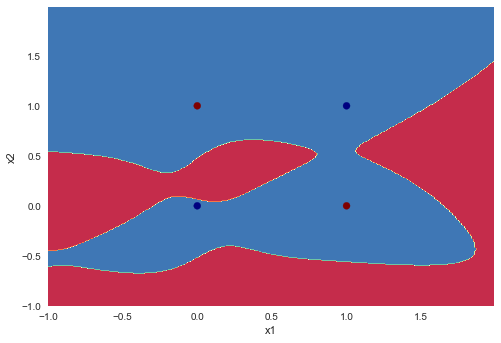

In [262]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [264]:
outputs = model.predict(X)
acc=np.sum(outputs==Y)/Y.shape[0]
print(acc)

0.5


## Training model on different datasets 

In [270]:
def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500,shuffle=True,noise=0.2,random_state=1,factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        X=np.array([
            [0,0],
            [0,1],
            [1,0],
            [1,1]
        ])
        Y=np.array([0,1,1,0])
    return X,Y

Trainng Acc 1.0000


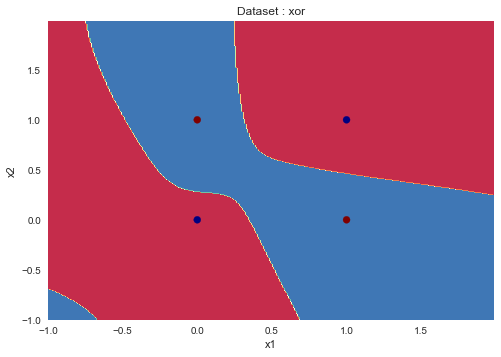

Trainng Acc 0.9540


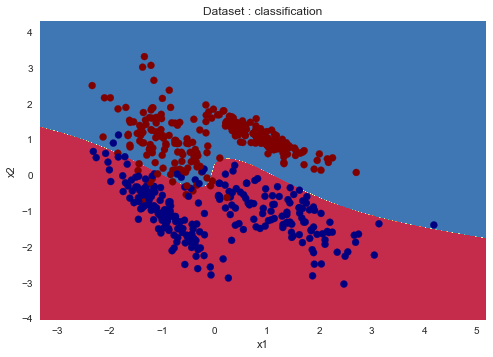

Trainng Acc 0.9540


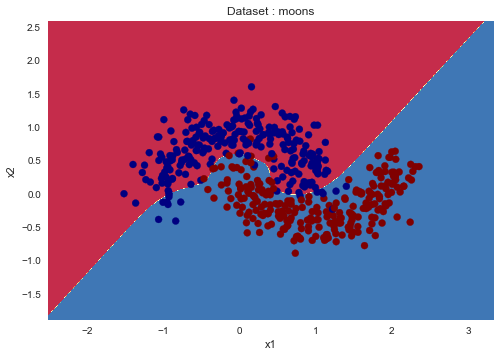

Trainng Acc 0.9640


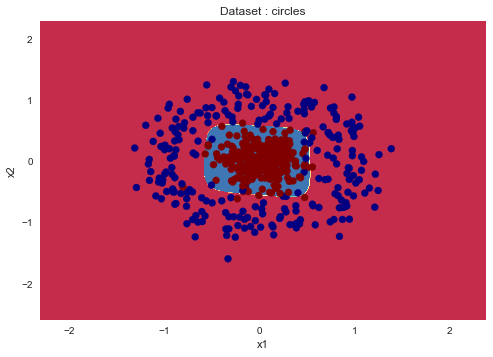

In [273]:
datasets = ["xor","classification","moons","circles"]

for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[8,4],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    outputs = model.predict(X)
    
    training_score=np.sum(outputs==Y)/Y.shape[0]
    print("Trainng Acc %0.4f"%training_score)
    
    plt.title("Dataset : "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    plt.show()